# Introduction

The CVaR at quantile β for a random variable X representing the loss on a portfolio is defined by
$CVaR_β$ = E[X|X > $VaR_β$]

We consider the Risk the function Va(X) = ${(1 − β)}^{−1}$ ${(X − a)}^{+}$ + a

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import gammainc, gamma

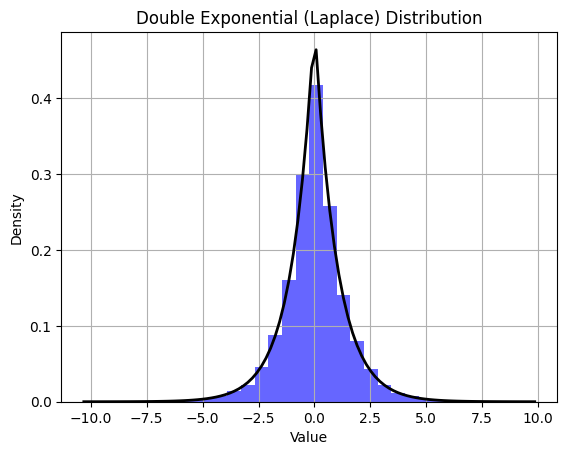

In [2]:
# Parameters for the Laplace distribution
mu = 0    # location (mean)
b = 1     # scale (diversity)

# Generate Laplace distributed data
data = np.random.laplace(mu, b, 10000)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')

# Plot the Laplace distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1/(2*b)) * np.exp(-np.abs(x - mu)/b)
plt.plot(x, p, 'k', linewidth=2)

title = "Double Exponential (Laplace) Distribution"
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In this experiment we assume the nominal model to follow double exponential distribution DE(μ, b)
with location parameter μ and scale parameter b.

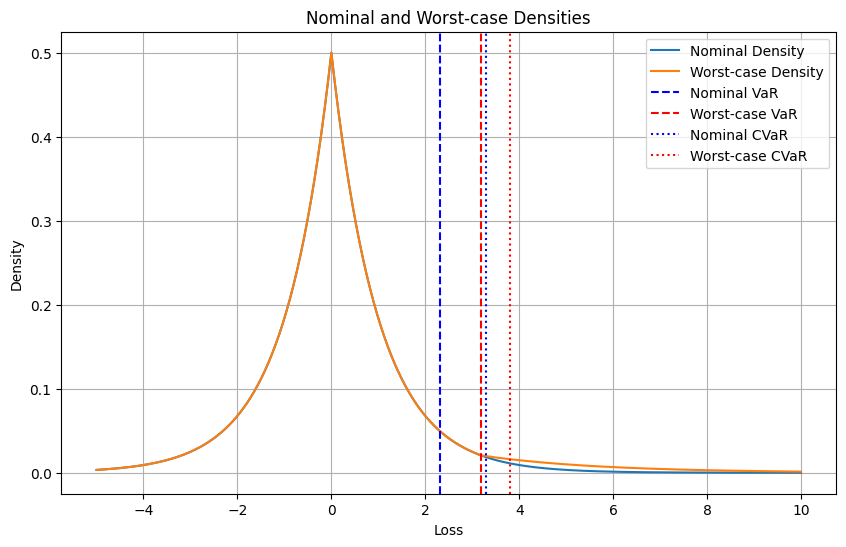

nominal_VaR:  2.303 nominal_CVaR:  3.303
wc_VaR:  3.188 wc_CVaR:  3.813


In [3]:
# Parameters
mu = 0
b = 1
beta = 0.95
theta = 0.03

# Calculate nominal VaR and CVaR
nominal_VaR = mu - b * np.log(2 * (1 - beta))
nominal_CVaR = nominal_VaR + b

# Calculate worst-case VaR and CVaR
a_star = mu - b * np.log(2 * (1 - beta - theta * b)/(1 - theta*b))
wc_VaR = a_star
wc_CVaR = a_star + 1 / (1 / b + theta / (1 - beta))

# Generate x values
x = np.linspace(-5, 10, 1000)

# Nominal density
nominal_density = (1 / (2 * b)) * np.exp(-np.abs(x - mu) / b)

# Worst-case density
# The actual denominator need to be evaluated by sampling, still its approximately equal to (1/2b) 
worst_case_density = (1 / (2 * b)) * np.exp(-np.abs(x - mu) / b + theta / (1 - beta) * (x - a_star) * (x > a_star))

# Plot the densities
plt.figure(figsize=(10, 6))
plt.plot(x, nominal_density, label='Nominal Density')
plt.plot(x, worst_case_density, label='Worst-case Density')
plt.axvline(nominal_VaR, color='blue', linestyle='--', label='Nominal VaR')
plt.axvline(wc_VaR, color='red', linestyle='--', label='Worst-case VaR')
plt.axvline(nominal_CVaR, color='blue', linestyle=':', label='Nominal CVaR')
plt.axvline(wc_CVaR, color='red', linestyle=':', label='Worst-case CVaR')
plt.xlabel('Loss')
plt.ylabel('Density')
plt.title('Nominal and Worst-case Densities')
plt.legend()
plt.grid(True)
plt.show()

# Print the calculated values
print('nominal_VaR: ', round(nominal_VaR, 3), 'nominal_CVaR: ', round(nominal_CVaR, 3))
print('wc_VaR: ', round(wc_VaR, 3), 'wc_CVaR: ', round(wc_CVaR, 3))


Notice the slight change of VaR and CVaR towards the right(increased).


Next we vary the hyperparameters of the enviroment and examime the behaviour of the Worst-case scennario in some Test Cases.

In [4]:
def test_case(mu, b, beta, theta):
    try:
        # Calculate nominal VaR and CVaR
        nominal_VaR = mu - b * np.log(2 * (1 - beta))
        nominal_CVaR = nominal_VaR + b

        # Calculate worst-case VaR and CVaR
        a_star = mu - b * np.log(2 * (1 - beta - theta * b)/(1 - theta*b))
        worst_case_CVaR = a_star + 1 / (1 / b + theta / (1 - beta))

        return {
            "nominal_VaR": nominal_VaR,
            "nominal_CVaR": nominal_CVaR,
            "worst_case_VaR": a_star,
            "worst_case_CVaR": worst_case_CVaR
        }
    except Exception as e:
        return str(e)

# Define test cases
test_cases = [
    (0, 1, 0.95, 0),
    (0, 1, 0.95, 0.01),
    (0, 1.1, 0.95, 0.03),
    (0, 0.5, 0.95, 0.03),
    (0, 1, 0.90, 0.03),
    (0, 1, 0.955, 0.03),
    (1, 1, 0.95, 0.03),
    (0, 1, 0.95, 1.1),
    (0, 1, 0.95, 0.001),
    # (0, 0, 0.95, 0.03)
]
# for case in test_cases:
#     print(1-case[2]-case[1]*case[3],1-case[1]*case[3])
# Run test cases
for i, params in enumerate(test_cases, 1):
    result = test_case(*params)
    print(f"Test Case {i}: {result}")


Test Case 1: {'nominal_VaR': 2.302585092994045, 'nominal_CVaR': 3.302585092994045, 'worst_case_VaR': 2.302585092994045, 'worst_case_CVaR': 3.302585092994045}
Test Case 2: {'nominal_VaR': 2.302585092994045, 'nominal_CVaR': 3.302585092994045, 'worst_case_VaR': 2.5156783084547527, 'worst_case_CVaR': 3.349011641788086}
Test Case 3: {'nominal_VaR': 2.5328436022934495, 'nominal_CVaR': 3.6328436022934496, 'worst_case_VaR': 3.682621767920844, 'worst_case_CVaR': 4.345272370330483}
Test Case 4: {'nominal_VaR': 1.1512925464970225, 'nominal_CVaR': 1.6512925464970225, 'worst_case_VaR': 1.3220731995613644, 'worst_case_CVaR': 1.706688584176749}
Test Case 5: {'nominal_VaR': 1.6094379124341005, 'nominal_CVaR': 2.6094379124341005, 'worst_case_VaR': 1.9356536488881244, 'worst_case_CVaR': 2.7048844181188936}
Test Case 6: {'nominal_VaR': 2.407945608651871, 'nominal_CVaR': 3.407945608651871, 'worst_case_VaR': 3.4760986898352706, 'worst_case_CVaR': 4.076098689835271}
Test Case 7: {'nominal_VaR': 3.3025850929

## Heavy - tail case 

In this case, we need to use α-divergence as the uncertainty measure.

For purposes of illustration, it is convenient to choose as
nominal model a generalized Pareto distribution with density
function
or a generalized extreme value distribution with density.

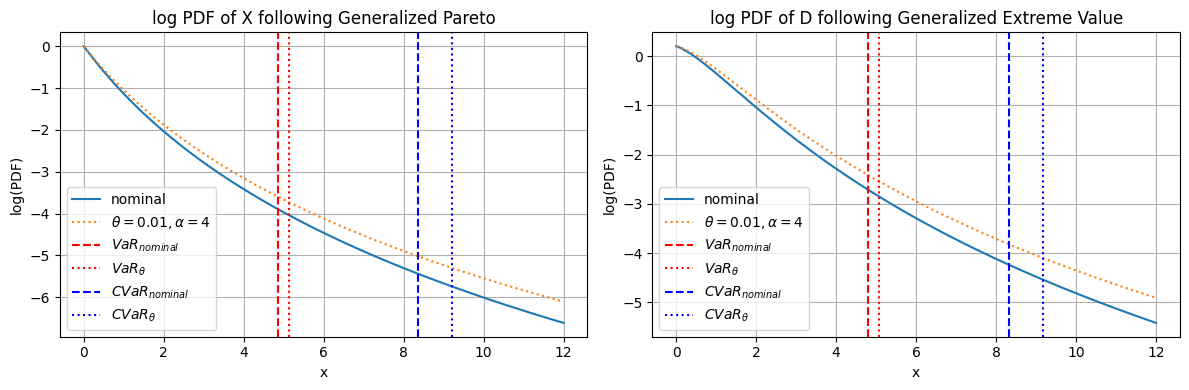

Generalized Pareto:
Nominal VaR: 4.854853507438601
Nominal CVaR: 8.364076439198001
Worst-case VaR: 5.143252849784717
Worst-case CVaR: 9.214879274677074

Generalized Extreme Value:
Nominal VaR: 4.792362609405395
Nominal CVaR: 8.32755537373342
Worst-case VaR: 5.074228895100413
Worst-case CVaR: 9.17373008241768


In [13]:

# Common parameters
beta = 0.95
theta = 0.01
alpha = 4

# Parameters for the Generalized Pareto Distribution
b_gp = 1
xi_gp = 0.3

# Define the density function for Generalized Pareto
def genpareto_pdf(x, xi, b):
    return (1 / b) * (1 + (xi / b) * x) ** (-1 / xi - 1)

def genpareto_pdf_worst(x, xi, b,alpha):
    return (1 / b) * (1 + (xi / b) * x) ** ((-1 / xi - 1)+(1/(alpha-1)))

# Calculate nominal VaR and CVaR for Generalized Pareto
nominal_VaR_gp = (b_gp / xi_gp) * ((1 - beta) ** (-xi_gp) - 1)
nominal_CVaR_gp = (nominal_VaR_gp + b_gp) / (1 - xi_gp)

# Calculate worst-case VaR and CVaR for Generalized Pareto
xi_gp_w = xi_gp*(alpha - 1)/(alpha - 1 - xi_gp)
worst_case_VaR_gp = (b_gp / xi_gp_w) * ((1 - beta) ** (-xi_gp_w) - 1)
worst_case_CVaR_gp = (worst_case_VaR_gp + b_gp) / (1 - xi_gp_w)

# Generate x values
x = np.linspace(0, 12, 1000)

# Nominal density for Generalized Pareto
nominal_density_gp = genpareto_pdf(x, xi_gp, b_gp)

# Worst-case density for Generalized Pareto
worst_case_density_gp = genpareto_pdf_worst(x, xi_gp, b_gp,alpha)

# Plot the densities for Generalized Pareto
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x, np.log(nominal_density_gp), label='nominal')
plt.plot(x, np.log(worst_case_density_gp), label=r'$\theta=0.01, \alpha=4$', linestyle=':')
plt.axvline(nominal_VaR_gp, color='red', linestyle='--', label=r'$VaR_{nominal}$')
plt.axvline(worst_case_VaR_gp, color='red', linestyle=':', label=r'$VaR_{\theta}$') 
plt.axvline(nominal_CVaR_gp, color='blue', linestyle='--', label=r'$CVaR_{nominal}$')
plt.axvline(worst_case_CVaR_gp, color='blue', linestyle=':', label=r'$CVaR_{\theta}$')  
plt.xlabel('x')
plt.ylabel('log(PDF)')
plt.title('log PDF of X following Generalized Pareto')
plt.legend()
plt.grid(True)

# Parameters for the Generalized Extreme Value Distribution
xi_gev = 0.3

# Define the density function for Generalized Extreme Value
def genextreme_pdf(x, xi):
    return (1 / xi) * (1 + xi * x) ** (-1 / xi - 1) * np.exp(-(1 + xi * x) ** (-1 / xi))

def genextreme_pdf_worst(x,xi,alpha):
    return (1 / xi) * (1 + xi * x) ** ((-1 / xi - 1) + 1/(alpha - 1)) * np.exp(-(1 + xi * x) ** (-1 / xi))

def cvar_gev(alpha, xi):
    a  = -np.log(alpha)
    lower_gamma = gamma(1-xi) * gammainc(1-xi, a)   # γ(1-ξ,a)
    val = (lower_gamma - (1-alpha)) / (xi*(1-alpha))
    return val

# Calculate nominal VaR and CVaR for Generalized Extreme Value
nominal_VaR_gev = (1 / xi_gev) * ((-np.log(beta)) ** (-xi_gev) - 1)
nominal_CVaR_gev = cvar_gev(beta, xi_gev)

# Calculate worst-case VaR and CVaR for Generalized Extreme Value
xi_gev_w = xi_gev*(alpha - 1)/(alpha - 1 - xi_gev)
worst_case_VaR_gev = (1 / xi_gev_w) * ((-np.log(beta)) ** (-xi_gev_w) - 1)
worst_case_CVaR_gev = cvar_gev(beta, xi_gev_w)

# Nominal density for Generalized Extreme Value
nominal_density_gev = genextreme_pdf(x, xi_gev)

# Worst-case density for Generalized Extreme Value
worst_case_density_gev = genextreme_pdf_worst(x, xi_gev, alpha)

# Plot the densities for Generalized Extreme Value
plt.subplot(1, 2, 2)
plt.plot(x, np.log(nominal_density_gev), label='nominal')
plt.plot(x, np.log(worst_case_density_gev), label=r'$\theta=0.01, \alpha=4$', linestyle=':')
plt.axvline(nominal_VaR_gev, color='red', linestyle='--', label=r'$VaR_{nominal}$')
plt.axvline(worst_case_VaR_gev, color='red', linestyle=':', label=r'$VaR_{\theta}$')
plt.axvline(nominal_CVaR_gev, color='blue', linestyle='--', label=r'$CVaR_{nominal}$')
plt.axvline(worst_case_CVaR_gev, color='blue', linestyle=':', label=r'$CVaR_{\theta}$')
plt.xlabel('x')
plt.ylabel('log(PDF)')
plt.title('log PDF of D following Generalized Extreme Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the calculated values
print("Generalized Pareto:")
print("Nominal VaR:", nominal_VaR_gp)
print("Nominal CVaR:", nominal_CVaR_gp)
print("Worst-case VaR:", worst_case_VaR_gp)
print("Worst-case CVaR:", worst_case_CVaR_gp)

print("\nGeneralized Extreme Value:")
print("Nominal VaR:", nominal_VaR_gev)
print("Nominal CVaR:", nominal_CVaR_gev)
print("Worst-case VaR:", worst_case_VaR_gev)
print("Worst-case CVaR:", worst_case_CVaR_gev)
